# Survival Analysis Plot
This notebook generates bar plots for different milestones, highlighting incorrect implementations with a red asterisk (*), and ensures the Y-axis extends up to 65 minutes.

In [15]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./data/dataBinary_milestones_valid_60_final.csv"  
df = pd.read_csv(file_path)
#drop outliers computed with dbscam
#df = df[~df['PX'].isin('P3','P15','P20','P22','P23','P24')]
df = df.query("PX != ['P3','P15','P20','P22','P23','P24']")
df

,Unnamed: 0,PX,Participant,start,issue,problem,folder,file,class,method,...,group,issue_number,right folder,right file,right class,right method,right lines,Correctness Explanation,correct,sound solution
0,0,P0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,...,Control,5679,y,y,y,n,n,Participant only had 1 of two methods identifi...,n,n
1,1,P1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,...,Treatment,5485,y,y,y,y,y,Completed the code changes in the right place ...,y,y
2,2,P2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,60.0,...,Control,4612,n,n,n,n,n,He did not find the correct folder or any othe...,n,n
4,4,P4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,...,Control,4612,n,n,n,n,n,He did not find the correct folder or any othe...,n,n
5,5,P5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,...,Treatment,5069,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
6,6,P6,kv582@nau.edu,12:44 PM,11,19,60.0,60.0,60.0,60.0,...,Control,5485,n,n,n,n,n,He did not find the correct folder or any othe...,n,n
7,7,P7,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,...,Treatment,5485,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
8,8,P8,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,...,Treatment,5485,y,y,y,y,y,Completed the code changes in the right place.,y,y
9,9,P9,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,...,Control,5069,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
10,10,P10,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,...,Control,4612,n,n,n,n,n,He did not find the correct folder or any othe...,n,n


In [16]:
df.columns

Index(['Unnamed: 0', 'PX', 'Participant', 'start', 'issue', 'problem',
       'folder', 'file', 'class', 'method', 'line', 'solution', 'implement',
       'end', 'group', 'issue_number', 'right folder', 'right file',
       'right class', 'right method', 'right lines', 'Correctness Explanation',
       'correct', 'sound solution'],
      dtype='object')

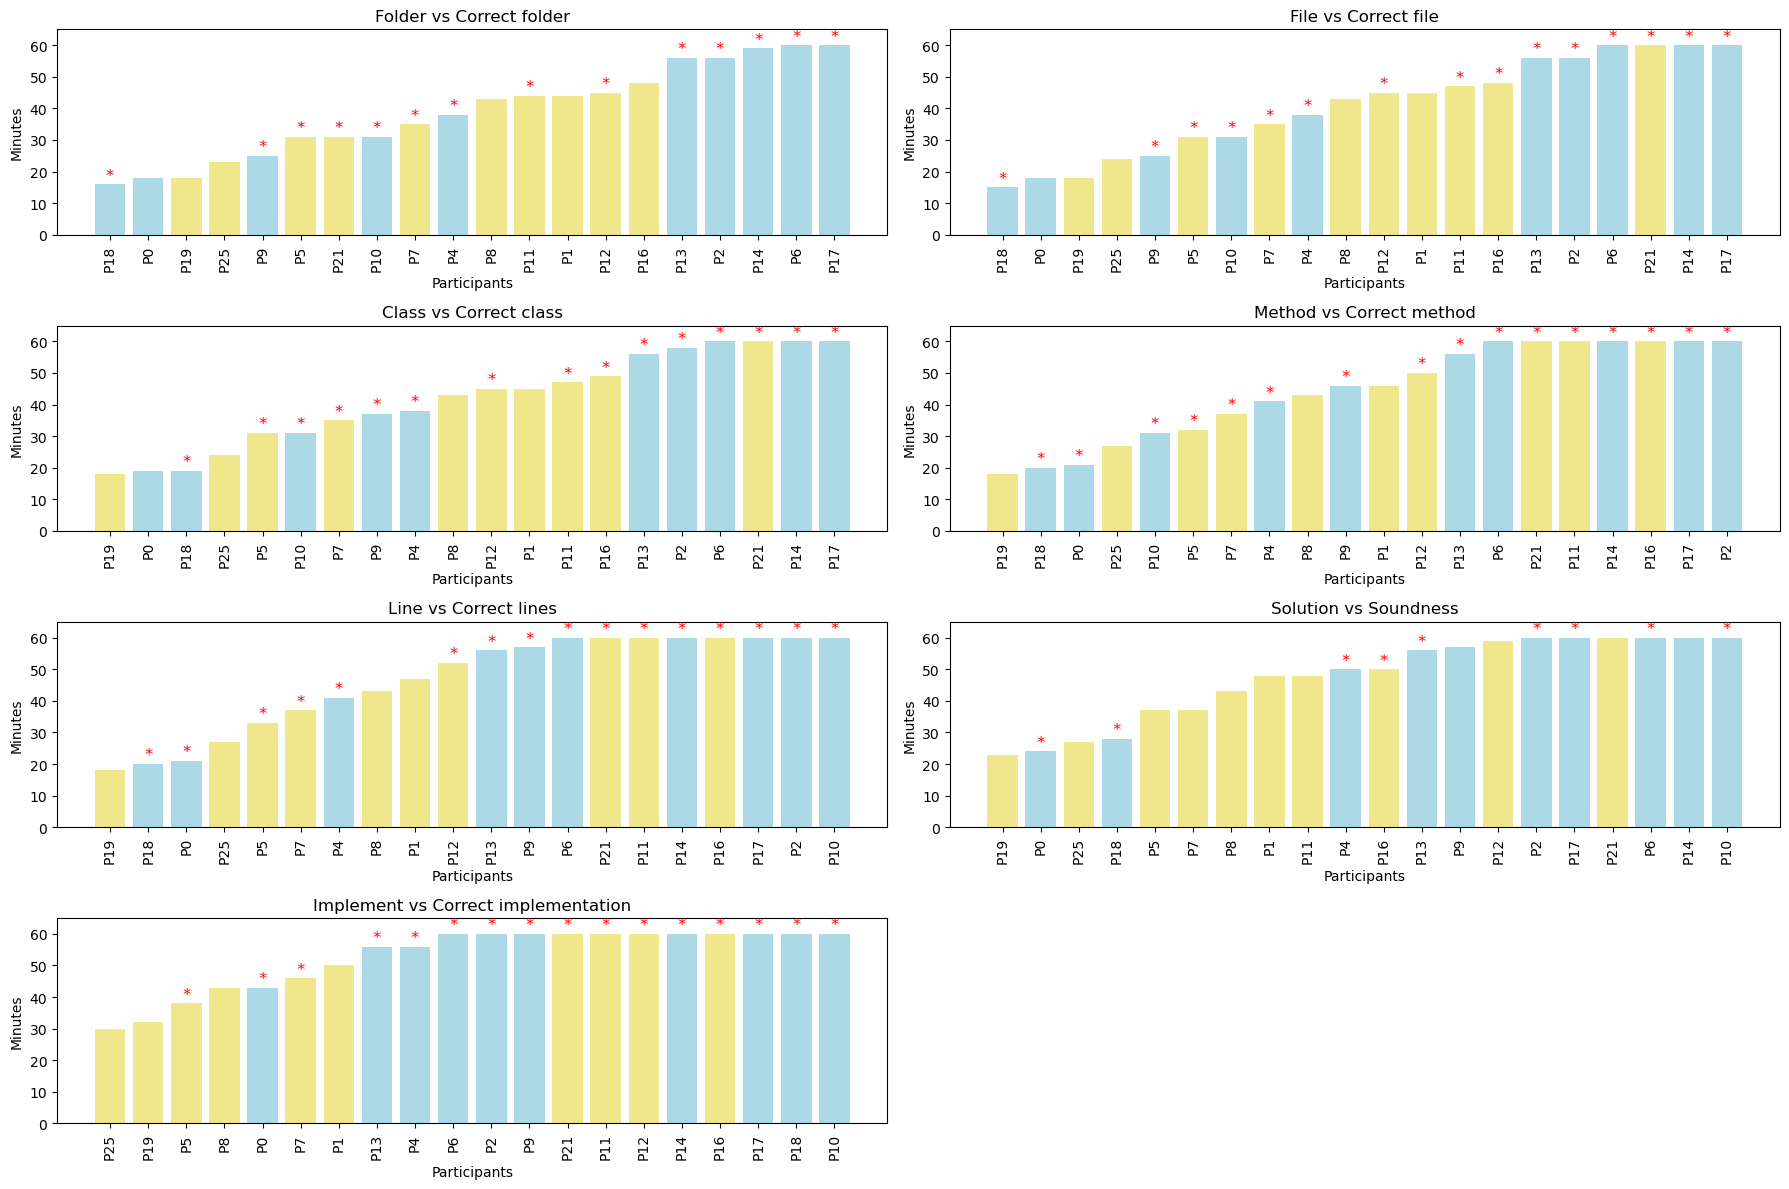

In [20]:



# Rename columns for consistency
df.rename(columns={'correct': 'correct implementation', 'sound solution': 'soundness', 'right folder': 'correct folder', 'right file': 'correct file', 'right class': 'correct class', 'right method': 'correct method', 'right lines': 'correct lines'}, inplace=True)

# Define the column pairs for plotting
column_pairs = [
    ("folder", "correct folder"),
    ("file", "correct file"),
    ("class", "correct class"),
    ("method", "correct method"),
    ("line", "correct lines"),
    ("solution", "soundness"),
    ("implement", "correct implementation")
]

# Set figure size
plt.figure(figsize=(18, 12))

# Loop through each pair of columns to create subplots
for i, (col, correct_col) in enumerate(column_pairs, 1):
    plt.subplot(4, 2, i)  # Arrange plots in a 3x2 grid

    # Sorting dataframe by the first column in the pair
    df_sorted = df.sort_values(by=col)

    # Define colors based on 'group'
    colors = df_sorted['group'].apply(lambda x: 'lightblue' if x == 'Control' else 'khaki')

    # Create bar plot
    bars = plt.bar(df_sorted['PX'], df_sorted[col], color=colors)

    # Add symbols on top where correct column equals 'n'
    for bar, correct_value in zip(bars, df_sorted[correct_col]):
        if correct_value == 'n':
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, '*', 
                     ha='center', va='bottom', color='red', fontsize=12)

    # Set labels and titles
    plt.xlabel('Participants')
    plt.ylabel('Minutes')
    plt.title(f'{col.capitalize()} vs {correct_col.capitalize()}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for clarity

    # Extend y-axis to 65 minutes
    plt.ylim([0, 65])

# Adjust layout
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/survival-multiple-correct-y65.png', format='png')
plt.savefig('./figures/survival-multiple-correct-y65.pdf', format='pdf')

# Show the plot
plt.show()


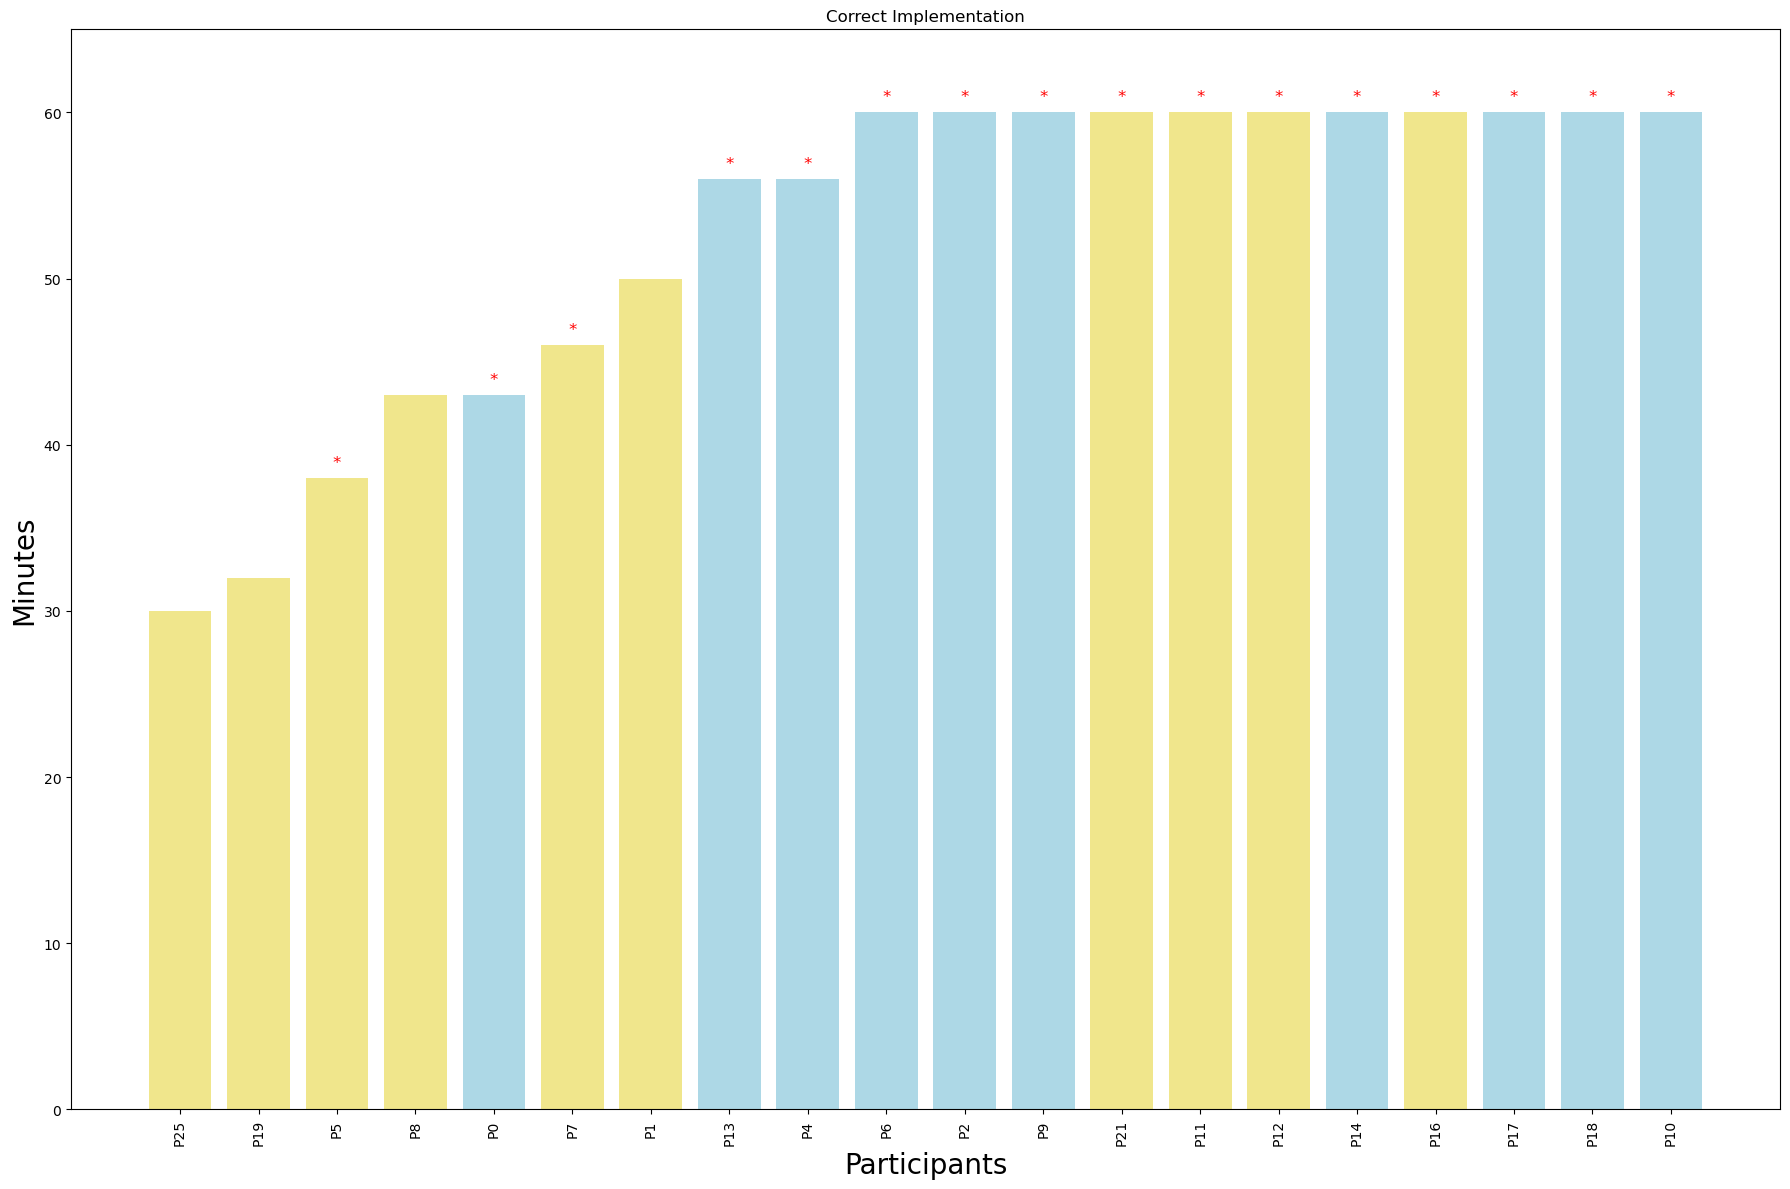

In [25]:


# Define the column pairs for plotting
column_pairs = [

    ("implement", "correct implementation")
]

# Set figure size
plt.figure(figsize=(18, 12))

# Loop through each pair of columns to create subplots
for i, (col, correct_col) in enumerate(column_pairs, 1):
    #plt.subplot(4, 2, i)  # Arrange plots in a 3x2 grid

    # Sorting dataframe by the first column in the pair
    df_sorted = df.sort_values(by=col)

    # Define colors based on 'group'
    colors = df_sorted['group'].apply(lambda x: 'lightblue' if x == 'Control' else 'khaki')

    # Create bar plot
    bars = plt.bar(df_sorted['PX'], df_sorted[col], color=colors)

    # Add symbols on top where correct column equals 'n'
    for bar, correct_value in zip(bars, df_sorted[correct_col]):
        if correct_value == 'n':
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, '*', 
                     ha='center', va='bottom', color='red', fontsize=12)

    # Set labels and titles
    plt.xlabel('Participants', fontsize=20)
    plt.ylabel('Minutes', fontsize=20)
    plt.title('Correct Implementation')
    plt.xticks(rotation=90)  # Rotate x-axis labels for clarity

    # Extend y-axis to 65 minutes
    plt.ylim([0, 65])

# Adjust layout
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/survival-multiple-correct-y65-implement.png', format='png')
plt.savefig('./figures/survival-multiple-correct-y65-implement.pdf', format='pdf')

# Show the plot
plt.show()


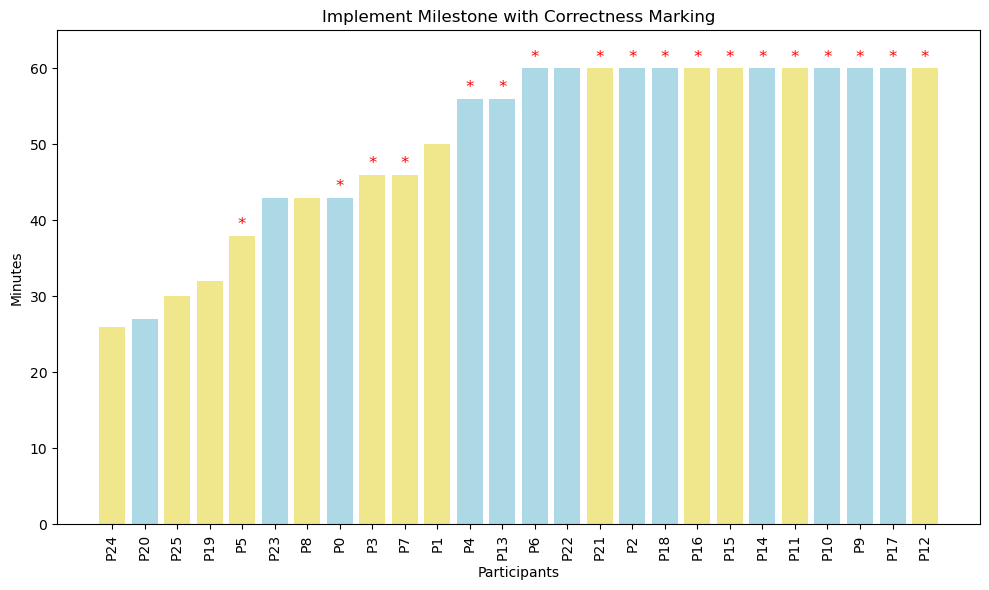

In [28]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./data/dataBinary_milestones_valid_60_final.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={'correct': 'implement_correct'}, inplace=True)

# Sorting dataframe by 'implement' milestone
df_sorted = df.sort_values(by="implement")

# Define colors based on 'group'
colors = df_sorted['group'].apply(lambda x: 'lightblue' if x == 'Control' else 'khaki')


# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted['PX'], df_sorted["implement"], color=colors)

# Add symbols on top where 'implement_correct' column equals 'n'
for bar, correct_value in zip(bars, df_sorted["implement_correct"]):
    if correct_value == 'n':
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, '*', 
                 ha='center', va='bottom', color='red', fontsize=12)

# Set labels and titles
plt.xlabel('Participants')
plt.ylabel('Minutes')
plt.title('Implement Milestone with Correctness Marking')
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity

# Extend y-axis to 65 minutes
plt.ylim([0, 65])

# Adjust layout
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/implement-milestone-y65.png', format='png')
plt.savefig('./figures/implement-milestone-y65.pdf', format='pdf')

# Show the plot
plt.show()


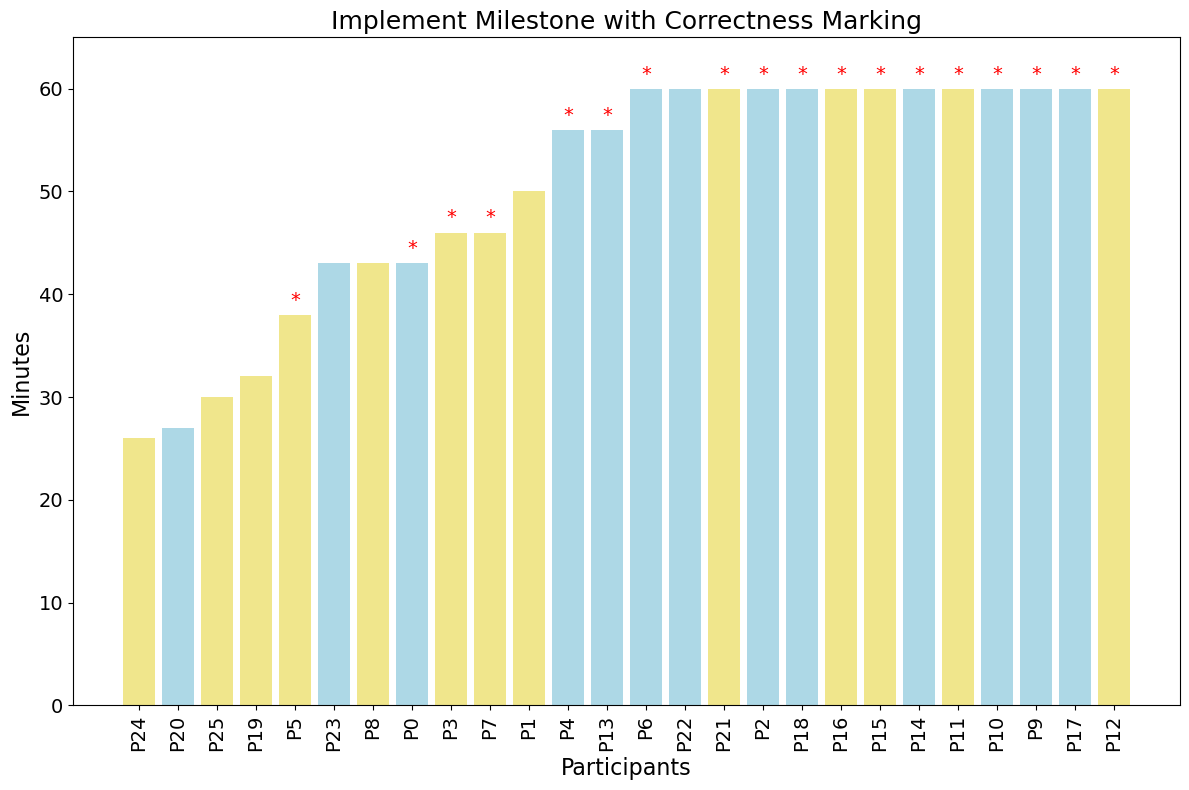

In [30]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./data/dataBinary_milestones_valid_60_final.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={'correct': 'implement_correct'}, inplace=True)

# Sorting dataframe by 'implement' milestone
df_sorted = df.sort_values(by="implement")

# Define colors based on 'group'
colors = df_sorted['group'].apply(lambda x: 'lightblue' if x == 'Control' else 'khaki')

# Create bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['PX'], df_sorted["implement"], color=colors)

# Add symbols on top where 'implement_correct' column equals 'n'
for bar, correct_value in zip(bars, df_sorted["implement_correct"]):
    if correct_value == 'n':
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, '*', 
                 ha='center', va='bottom', color='red', fontsize=14)

# Set labels and titles with increased font size
plt.xlabel('Participants', fontsize=16)
plt.ylabel('Minutes', fontsize=16)
plt.title('Implement Milestone with Correctness Marking', fontsize=18)
plt.xticks(rotation=90, fontsize=14)  # Rotate x-axis labels for clarity and increase font size
plt.yticks(fontsize=14)  # Increase font size for y-axis labels

# Extend y-axis to 65 minutes
plt.ylim([0, 65])

# Adjust layout
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/implement-milestone-y65-large-font.png', format='png')
plt.savefig('./figures/implement-milestone-y65-large-font.pdf', format='pdf')

# Show the plot
plt.show()
